# Càlcul de la signatura aplicada a funcions de distribució de probabilitat

Implementem una nova classe DataFromFunction que hereda de la classe Data i servirà per generar vectors de dades a partir d'una funció donada

In [2]:
import classes_sig
import numpy as np
class DataFromFunction (classes_sig.Data): #inherits from Data class
    def __init__(self, function, noise = False):
        self.function = function
        self.d = 1
        self.noise = noise
    def set_time_range(self, start, end, step):
        self.start = start
        self.end = end
        self.step = step
        self.generate_timestamps()
        if self.noise:
            self.generate_with_gaussian_noise(0, 0.05)
        else:
             self.generate_data()
        self.calculate_delta_X()
    def generate_timestamps(self):
        self.times =  [self.start + i*self.step for i in range(int((self.end - self.start)/self.step)+1)] #generate list of timestamps
    def generate_data(self):
        self.values = [[self.function(t)] for t in self.times] #generate list of values

    def generate_with_gaussian_noise(self, mean, std):
        data =  [[self.function(t)] for t in self.times]
        noise = np.random.normal(mean, std, size=len(self.times))
        noisy_data = [data[i] + noise[i] for i in range(len(self.times))]
        self.values = noisy_data
    def plot(self):

        import matplotlib.pyplot as plt
        plt.plot(self.times, self.values)
        plt.show()

    def __call__(self, *args, **kwargs):
        return self.function(*args, **kwargs)

### Distribució exponencial

Fem el càlcul de la signatura discreta plana utilitzant valors generats a partir de la pdf d'una distribució exponencial.

In [3]:
from scipy.stats import expon
scale = 1
exponential = expon(scale=scale)
data = DataFromFunction(exponential.pdf)
data.set_time_range(0, 10, 0.1)

signature = classes_sig.Signature(3,data)
signature.set_mu(0)
signature.set_delta_mu()
sig = signature.calculate_signature(0,10)
xticks = list(sig.keys())
sig

{'': 1,
 '0+': -0.999954600070238,
 '0-': -0.999954600070238,
 '0+0+': 0.5249337885282682,
 '0+0-': 0.47497541367336044,
 '0-0+': 0.5249337885282682,
 '0-0-': 0.47497541367336044,
 '0+0+0+': -0.19273036090643186,
 '0+0+0-': -0.17438737422914088,
 '0+0-0+': -0.15779222143556645,
 '0+0-0-': -0.1427742541582334,
 '0-0+0+': -0.19273036090643186,
 '0-0+0-': -0.17438737422914088,
 '0-0-0+': -0.15779222143556645,
 '0-0-0-': -0.1427742541582334}

In [4]:
# Amb diferents paràmetres d'escala
scale = [0.5,1, 2,3,4,5,6,7,8,9,10,11,12,13,20]
values1 = []
for s in scale:
    exponential = expon(scale=s)
    data = DataFromFunction(exponential.pdf)
    data.set_time_range(0, 10, 0.1)

    signature = classes_sig.Signature(3,data) #create signature object
    signature.set_mu(0)
    signature.set_delta_mu()
    #print("Scale: ", s)
    current = list(signature.calculate_signature(0,10).values()) #calculate signature
    values1.append(current)
    #print("Signature: ", current)


Ordenant els valors de la signatura en l'ordre natural en que han estat generades les variables, 

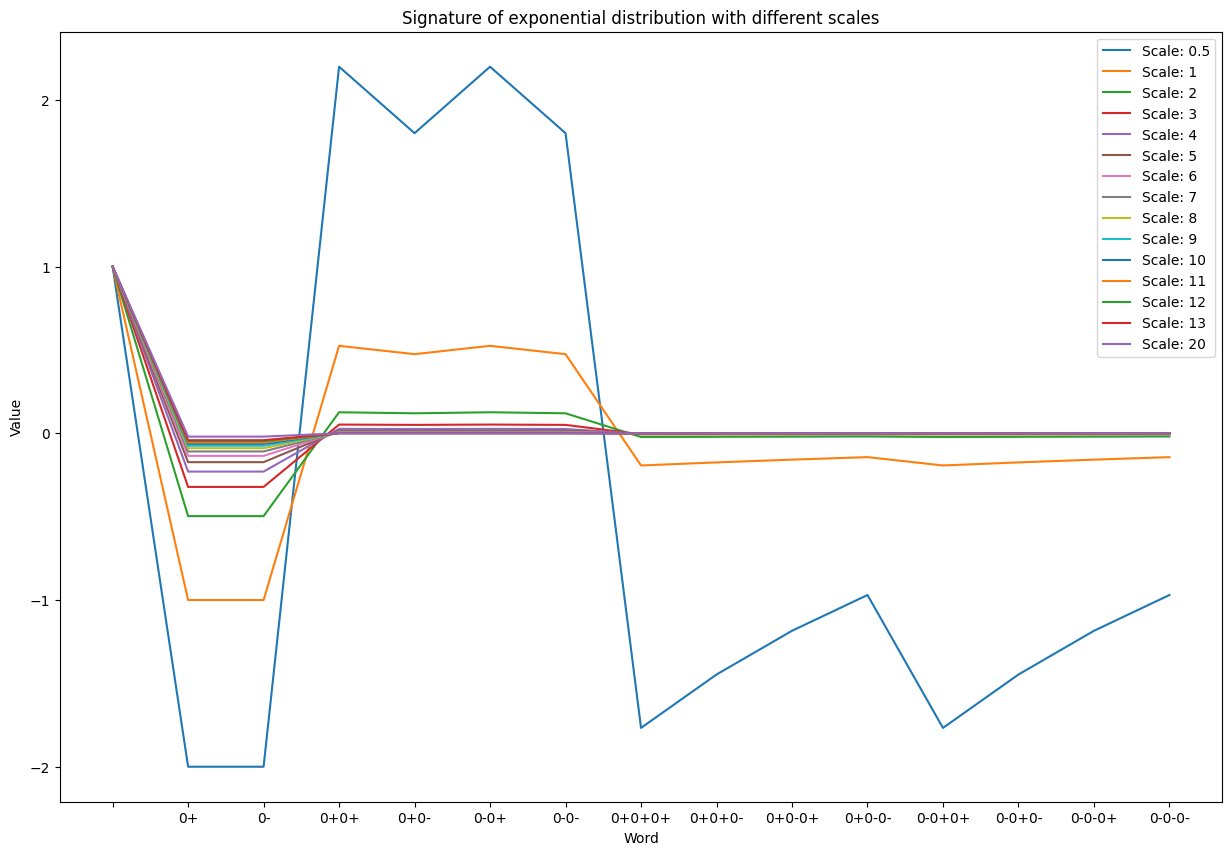

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

x = list(range(0,len(values1[0])))
for i,values_ in enumerate(values1):
    plt.plot(x,values_,label = "Scale: "+str(scale[i])) #plot signature


plt.xlabel('Word')
plt.ylabel('Value')
plt.title('Signature of exponential distribution with different scales')
plt.xticks(x, xticks)
plt.legend()
plt.show()

### Distribució lognormal

In [7]:
from scipy.stats import lognorm
import numpy as np

sigma = 1  # standard deviation
mean = 0   # mean (location parameter)
lognormal_dist = lognorm(sigma, loc=mean)

data2 = DataFromFunction(lognormal_dist.pdf)
data2.set_time_range(0, 10, 0.1)

signature2 = classes_sig.Signature(3,data2)
signature2.set_mu(0)
signature2.set_delta_mu()
signature2.calculate_signature(0,10)

{'': 1,
 '0+': 0.0028159018901526803,
 '0-': 0.0028159018901526803,
 '0+0+': 0.08885467923223862,
 '0+0-': -0.08884674992878372,
 '0-0+': 0.08885467923223862,
 '0-0-': -0.08884674992878372,
 '0+0+0+': 0.013954377639437245,
 '0+0+0-': -0.06047178783388768,
 '0+0-0+': 0.046767616253649384,
 '0+0-0-': 0.013453987849179855,
 '0-0+0+': 0.013954377639437245,
 '0-0+0-': -0.06047178783388768,
 '0-0-0+': 0.046767616253649384,
 '0-0-0-': 0.013453987849179855}

In [8]:
scale = [0.5, 1, 2,3,4,5,6,7,8,9,10,11,12,13,20]

values2 = []
for s in scale:
    lognormal_dist = lognorm(s, loc=mean)
    data2 = DataFromFunction(lognormal_dist.pdf)
    data2.set_time_range(0, 10, 0.1)

    signature2 = classes_sig.Signature(3,data2)
    signature2.set_mu(0)
    signature2.set_delta_mu()
    #print("Scale: ", s)
    current = list(signature2.calculate_signature(0,10).values())
    values2.append(current)
    #print("Signature: ", current)
    

In [9]:
correlated_pairs = check_correlation(values2, threshold)
print("Correlated pairs:", correlated_pairs)
print("Number of correlated pairs:", len(correlated_pairs) ,"of", len(values2) * (len(values2) - 1) / 2)

Mean correlation:  0.8796852626705269
Correlated pairs: [(0, 1), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14)]
Number of correlated pairs: 77 of 105.0


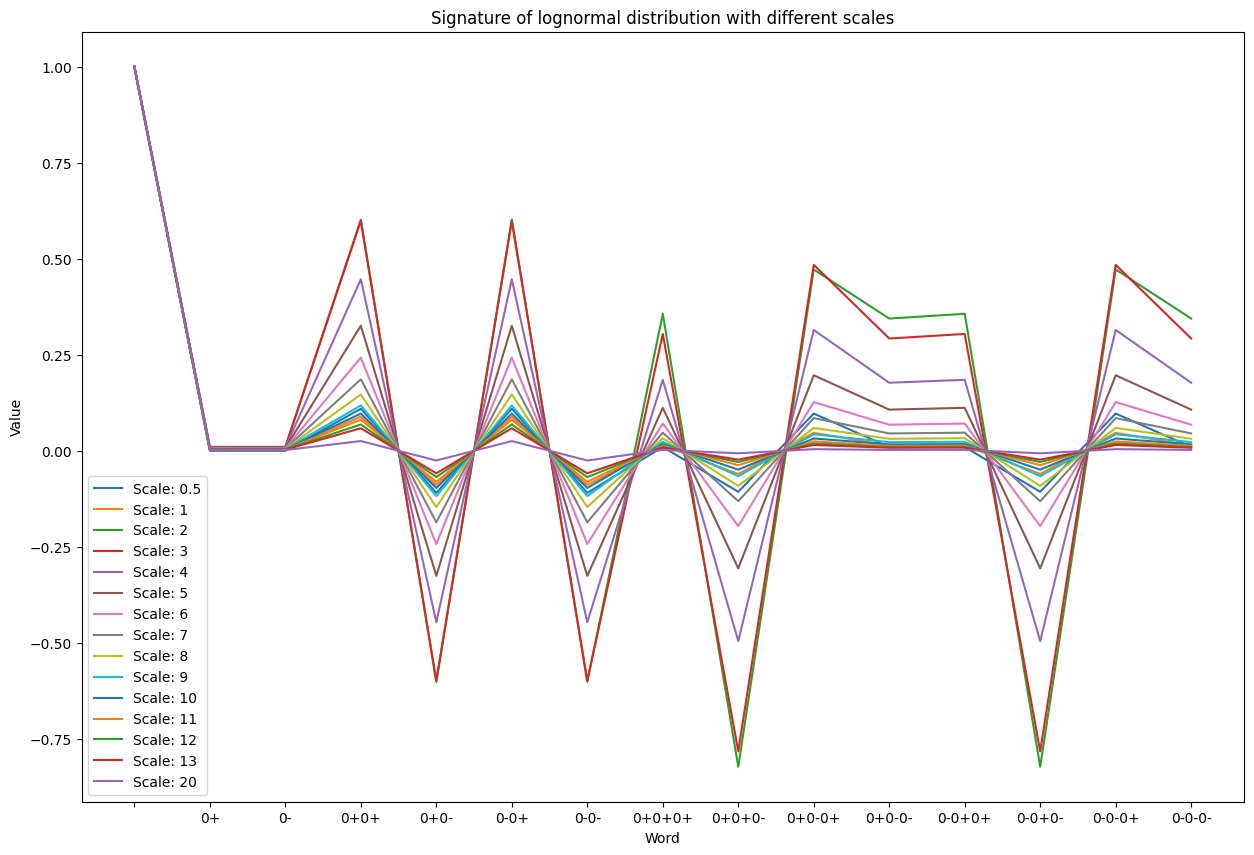

In [10]:
plt.figure(figsize=(15, 10))
x = list(range(0,len(values2[0])))
for i,values_ in enumerate(values2):
    plt.plot(x,values_,label = "Scale: "+str(scale[i])) #plot signature

plt.xlabel('Word')
plt.ylabel('Value')
plt.title('Signature of lognormal distribution with different scales')
plt.xticks(x, xticks)
plt.legend()
plt.show()


### Distribució gamma

In [11]:
from scipy.stats import gamma

shape = 2
scale = 1
gamma_dist = gamma(shape, scale=scale)

data3 = DataFromFunction(gamma_dist.pdf)
data3.set_time_range(0, 10, 0.1)
signature3 = classes_sig.Signature(3,data3)
signature3.set_mu(0)
signature3.set_delta_mu()
signature3.calculate_signature(0,10)


{'': 1,
 '0+': 0.0004539992976248486,
 '0-': 0.0004539992976248486,
 '0+0+': 0.012448143289748328,
 '0+0-': -0.012447937174386053,
 '0-0+': 0.012448143289748328,
 '0-0-': -0.012447937174386053,
 '0+0+0+': 0.0004933493323029005,
 '0+0+0-': -0.0039508761945421965,
 '0+0-0+': 0.0034631783105495573,
 '0+0-0-': 0.0004820465292585747,
 '0-0+0+': 0.0004933493323029005,
 '0-0+0-': -0.0039508761945421965,
 '0-0-0+': 0.0034631783105495573,
 '0-0-0-': 0.0004820465292585747}

In [12]:
shape = [0.5, 1,2,3,4,5,6,7,8,9,10,11,12,13,20]
values3 = []
for s in shape:
    gamma_dist = gamma(s, scale=scale)
    data3 = DataFromFunction(gamma_dist.pdf)
    data3.set_time_range(0, 10, 0.1)

    signature3 = classes_sig.Signature(3,data3)
    signature3.set_mu(0)
    signature3.set_delta_mu()
    #print("Shape: ", s)
    current = list(signature3.calculate_signature(0,10).values())
    values3.append(current)
    #print("Signature: ", current)
    

c:\Users\fparc\OneDrive\Escriptori\TFG - MATESSSSS\codis\classes_sig.py:96: RuntimeWarning: invalid value encountered in scalar multiply
  self.sig[word][m][n]  = self.delta_mu[n-1]*(self.signature(m, n-1, word) + self.data.delta_X[n-1][int(i)]*self.signature(m, n-1, w)) # calculate the signature value


In [13]:
correlated_pairs = check_correlation(values3, threshold)
print("Correlated pairs:", correlated_pairs)
print("Number of correlated pairs:", len(correlated_pairs) ,"of", len(values3) * (len(values3) - 1) / 2)


Mean correlation:  0.9245754514868119
Correlated pairs: [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14)]
Number of correlated pairs: 78 of 105.0


c:\Users\fparc\OneDrive\Escriptori\TFG - MATESSSSS\codis\.venv\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


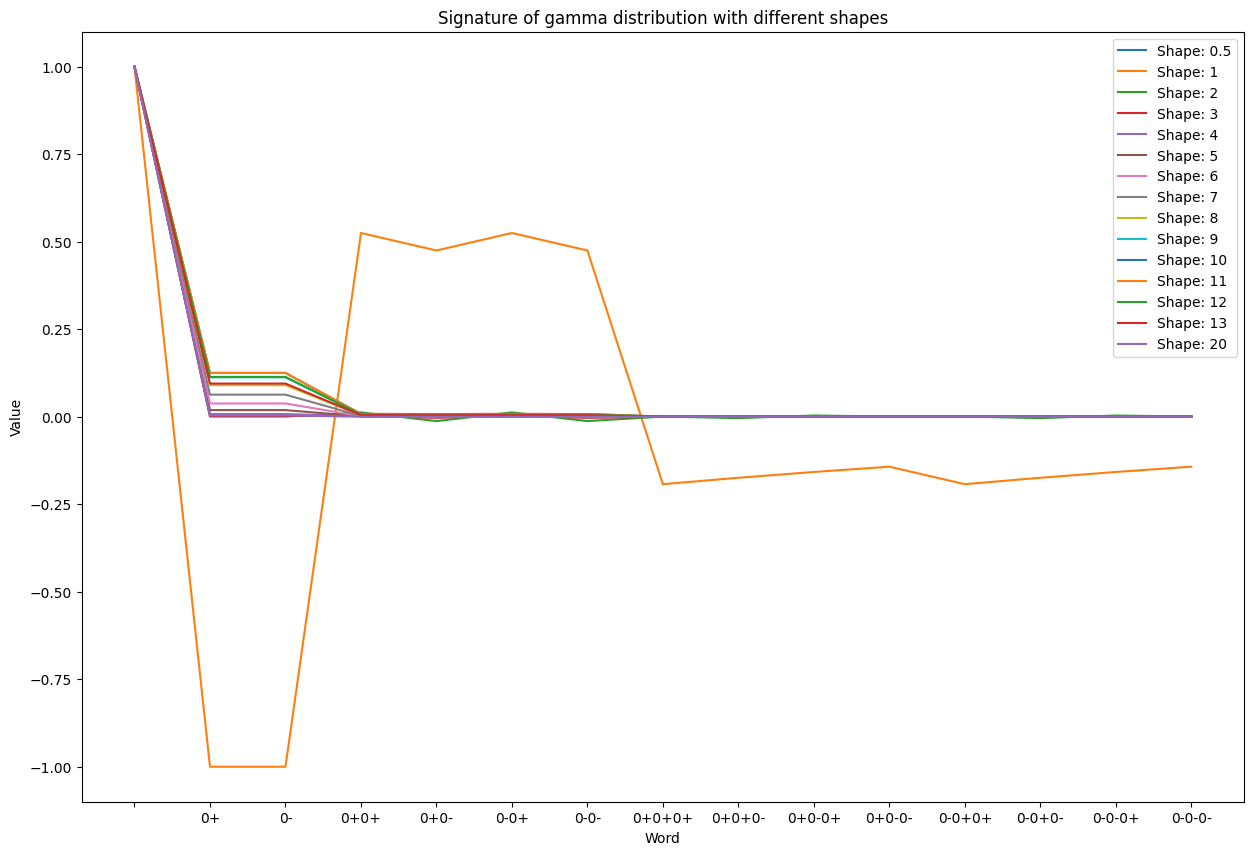

In [14]:
plt.figure(figsize=(15, 10))
x = list(range(0,len(values3[0])))
for i,values_ in enumerate(values3):
    plt.plot(x,values_,label = "Shape: "+str(shape[i])) #plot signature

plt.xlabel('Word')
plt.ylabel('Value')
plt.title('Signature of gamma distribution with different shapes')
plt.xticks(x, xticks)
plt.legend()

plt.show()


In [15]:
values_A = []
values_B = []
values_C = []
for i in range(100):
    sigma = 1  # standard deviation
    for j in range(10):
        shape = i
        scale = j
        

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

X = values1 + values2 + values3[1:]
y = ["Exponential" ]*len(values1) + ["Lognormal" ]*len(values2) + ["Gamma" ]*(len(values3)-1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ("Train size: ", len(X_train))
print ("Test size: ", len(X_test))
clf = AdaBoostClassifier(n_estimators=150, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)

report = classification_report(y_test, clf.predict(X_test))
print(report)

Train size:  35
Test size:  9
Accuracy:  0.8888888888888888
              precision    recall  f1-score   support

 Exponential       0.75      1.00      0.86         3
       Gamma       1.00      0.67      0.80         3
   Lognormal       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



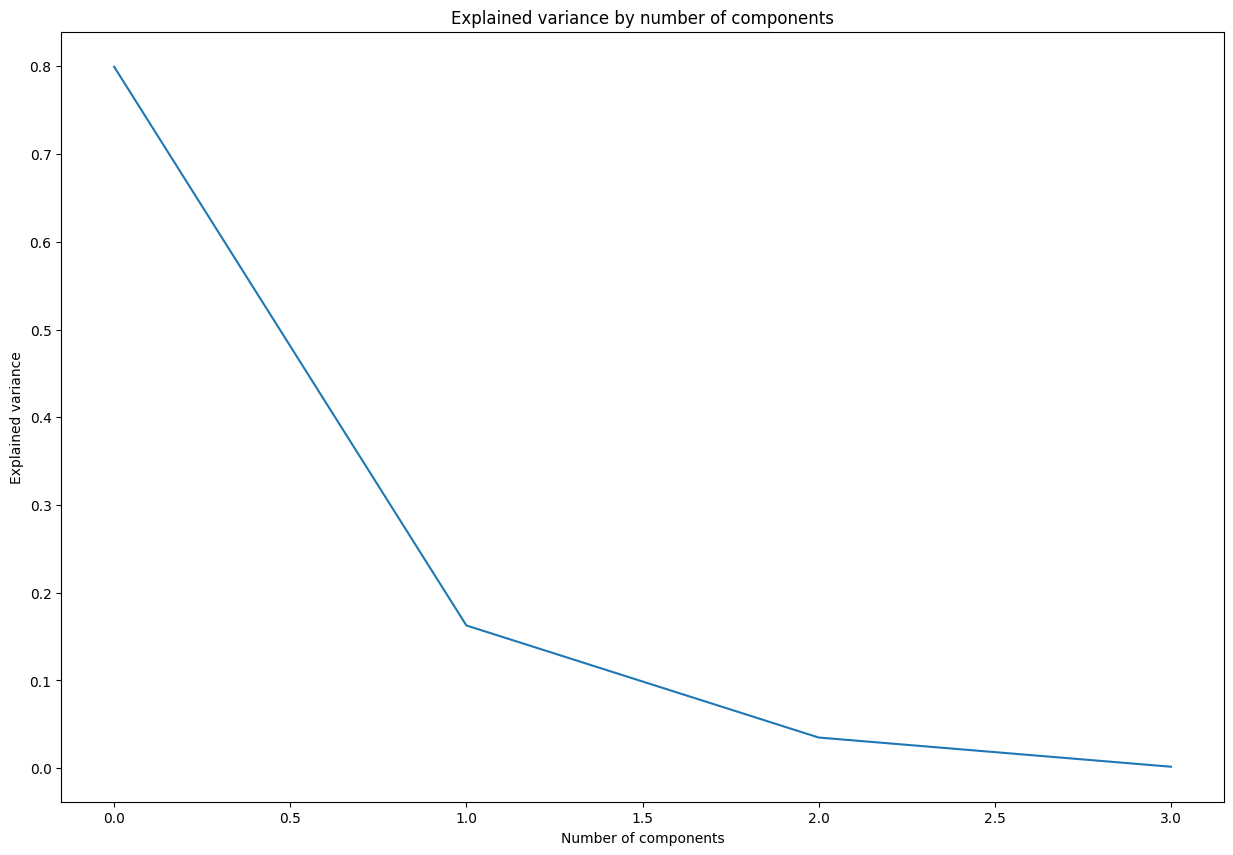

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance by number of components')
plt.show()


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(X)
X_pca = pca.transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.8, random_state=0)
print ("Train size: ", len(X_train2))
print ("Test size: ", len(X_test2))
clf2 = AdaBoostClassifier(n_estimators=150, random_state=0)
clf2.fit(X_train2, y_train2)
accuracy2 = clf2.score(X_test2, y_test2)
print("Accuracy: ", accuracy2)

report2 = classification_report(y_test2, clf2.predict(X_test2))
print(report2)


Train size:  8
Test size:  36
Accuracy:  0.6944444444444444
              precision    recall  f1-score   support

 Exponential       0.92      1.00      0.96        12
       Gamma       0.50      0.91      0.65        11
   Lognormal       1.00      0.23      0.38        13

    accuracy                           0.69        36
   macro avg       0.81      0.71      0.66        36
weighted avg       0.82      0.69      0.65        36



In [178]:
def signature_from_default_parameters(function):
    data = DataFromFunction(function, noise = False)
    data.set_time_range(0, 10,1)
    signature = classes_sig.Signature(2,data)
    signature.set_mu(0)
    signature.set_delta_mu()
    return list(signature.calculate_signature(0,10).values())

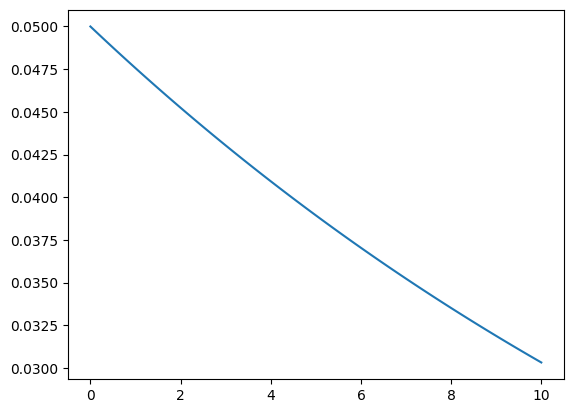

In [20]:

data_ = DataFromFunction(expon(scale=20).pdf, noise = False)
data_.set_time_range(0, 10, 0.1)
data_.plot()

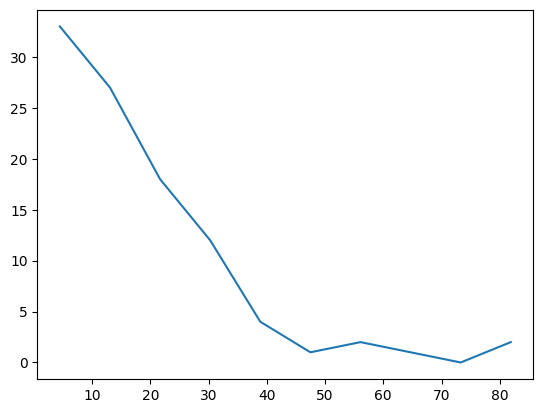

In [21]:
data_2 = np.random.exponential(20, size=100)
hist, bins = np.histogram(data_2, bins=10)
x = (bins[:-1] + bins[1:]) / 2
plt.plot(x, hist)
plt.show()


In [22]:
import numpy as np
from scipy.stats import expon, lognorm, gamma
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Generate exponential function signature vectors
exponential_signatures = []
for _ in range(1000):
    scale = np.random.uniform(0.1, 100)
    signature = signature_from_default_parameters(expon(scale=scale).pdf)
    exponential_signatures.append(signature)

# Generate lognormal function signature vectors
lognormal_signatures = []
for _ in range(1000):
    mean = 0
    sigma = np.random.uniform(0, 100)

    signature = signature_from_default_parameters(lognorm(sigma, loc=mean).pdf)
    lognormal_signatures.append(signature)
# Generate gamma function signature vectors
gamma_signatures = []
for _ in range(1000):
    shape = np.random.uniform(0.5, 15)
    scale = np.random.uniform(0.1, 3)
    signature = signature_from_default_parameters(gamma(a=shape, scale=scale).pdf)
    gamma_signatures.append(signature)

gamma_signatures = [signature for signature in gamma_signatures if not any(np.isnan(value) for value in signature)]
lognormal_signatures = [signature for signature in lognormal_signatures if not any(np.isnan(value) for value in signature)]
exponential_signatures = [signature for signature in exponential_signatures if not any(np.isnan(value) for value in signature)]



In [23]:
from sklearn.ensemble import RandomForestClassifier


X = exponential_signatures + lognormal_signatures + gamma_signatures
y = ["Exponential"] * len(exponential_signatures) + ["Lognormal"] * len(lognormal_signatures) + ["Gamma"] * len(gamma_signatures)
print(len(lognormal_signatures))
print(len(exponential_signatures))
print(len(gamma_signatures))
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)
print ("Train size: ", len(X_train))
print ("Test size: ", len(X_test))

clf = RandomForestClassifier(n_estimators=150, random_state=0)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)

report = classification_report(y_test, clf.predict(X_test))
print(report)

1000
1000
973
Train size:  2081
Test size:  892
Accuracy:  0.9887892376681614
              precision    recall  f1-score   support

 Exponential       1.00      1.00      1.00       321
       Gamma       1.00      0.97      0.98       288
   Lognormal       0.97      1.00      0.98       283

    accuracy                           0.99       892
   macro avg       0.99      0.99      0.99       892
weighted avg       0.99      0.99      0.99       892



In [24]:
clf2 = AdaBoostClassifier(n_estimators=150, random_state=0)
clf2.fit(X_train, y_train)
accuracy2 = clf2.score(X_test, y_test)
print("Accuracy: ", accuracy2)

report2 = classification_report(y_test, clf2.predict(X_test))
print(report2)

Accuracy:  0.3531390134529148
              precision    recall  f1-score   support

 Exponential       1.00      0.10      0.18       321
       Gamma       0.00      0.00      0.00       288
   Lognormal       0.33      1.00      0.50       283

    accuracy                           0.35       892
   macro avg       0.44      0.37      0.23       892
weighted avg       0.46      0.35      0.22       892



In [25]:
new_signature = signature_from_default_parameters(expon(scale=1).pdf)
new_signature = pca.transform([new_signature])
print(clf.predict(new_signature))
print(clf2.predict(new_signature))

['Exponential']
['Exponential']


In [26]:
new_signature = signature_from_default_parameters(lognorm(s=1, loc=0).pdf)
new_signature = pca.transform([new_signature])
print(clf.predict(new_signature))
print(clf2.predict(new_signature))

['Lognormal']
['Lognormal']


In [27]:
new_signature = signature_from_default_parameters(gamma(a=5, scale=1).pdf)
new_signature = pca.transform([new_signature])
print(clf.predict(new_signature))
print(clf2.predict(new_signature))

['Gamma']
['Lognormal']


In [190]:
from scipy.optimize import least_squares
def compute_vector(s):
    # This is a sample function, you should replace it with your own function
    return signature_from_default_parameters(expon(scale=s).pdf)

target_vector = signature_from_default_parameters(expon(scale=1.894517475).pdf)
initial_s = 20  # Initial guess for s
#print(len(target_vector))
'''for i in range(len(target_vector)):
    print(target_vector[i])'''
print(np.asanyarray(target_vector))
#print(signature_from_default_parameters(expon(scale=1.5).pdf))
def get_difference(s):
    #print (s)
    vect = compute_vector(s[0])
    #print(vect)
    return  np.asarray([vect[i] - target_vector[i] for i in range(len(target_vector))])

times =  [ i*0.5 for i in range(int((10 )/0.5)+1)]
target2 = [expon(scale=1.894517475).pdf(t) for t in times]
def get_difference2(s):
    vect =  [expon(scale=s[0]).pdf(t) for t in times]
    #print(vect)
    return  np.asarray([vect[i] - target2[i] for i in range(len(target2))])

import time

start_time = time.time()
print(least_squares(lambda s: get_difference(s), initial_s))
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

'''
start_time = time.time()
print(least_squares(lambda s: get_difference2(s), initial_s))
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")
'''

[ 1.         -0.52514657 -0.52514657  0.17382385  0.10195508  0.17382385
  0.10195508]
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 0.000e+00 -1.554e-15 -1.554e-15  1.027e-15  4.857e-16
                1.027e-15  4.857e-16]
           x: [ 1.895e+00]
        cost: 3.7064521779732354e-30
         jac: [[ 0.000e+00]
               [ 2.847e-01]
               [ 2.847e-01]
               [-2.056e-01]
               [-9.345e-02]
               [-2.056e-01]
               [-9.345e-02]]
        grad: [-1.398e-15]
  optimality: 1.3979935012557534e-15
 active_mask: [ 0.000e+00]
        nfev: 13
        njev: 10
Execution time: 0.04698324203491211 seconds


'\nstart_time = time.time()\nprint(least_squares(lambda s: get_difference2(s), initial_s))\nend_time = time.time()\nexecution_time = end_time - start_time\nprint("Execution time:", execution_time, "seconds")\n'

In [1]:
from scipy.optimize import curve_fit
def fit_function(x, s):
    return expon(scale=s).pdf(x)

popt, _ = curve_fit(fit_function, times, target2, p0=initial_s)
start_time = time.time()
print(popt)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

NameError: name 'times' is not defined